# CLOTHING IMAGE CLASSIFICATION - EDA

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
len(train_images)
train_images[0].shape

(28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
len(test_images)
len(test_labels)

10000

### Data Analysis and Normalization

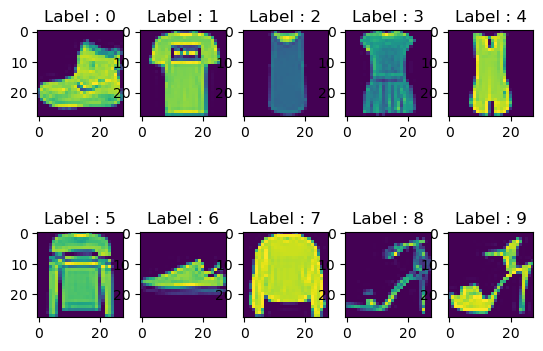

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.title("Label : " + str(i))
    plt.imshow(train_images[i].reshape(28,28), cmap=None)

In [8]:
train_images, test_images  = train_images / 255.0, test_images / 255.0
train_images[0].shape

(28, 28)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4992 - accuracy: 0.8214
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3815 - accuracy: 0.8613
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3517 - accuracy: 0.8713
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3301 - accuracy: 0.8781
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3107 - accuracy: 0.8852


In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8645


[0.3727869689464569, 0.8644999861717224]

In [11]:
model.evaluate(train_images, train_labels)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3002 - accuracy: 0.8881


[0.30020320415496826, 0.8881000280380249]

In [12]:
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

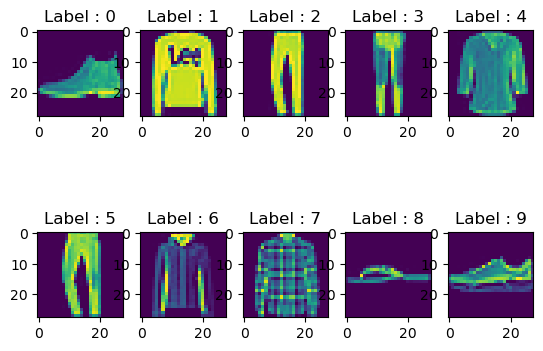

In [13]:
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.title("Label : " + str(i))
    plt.imshow(test_images[i].reshape(28,28), cmap=None)

In [14]:
model.predict(test_images[0:10])

1/1 [==============================] - 0s 111ms/step


array([[1.67844939e-06, 6.17492049e-08, 1.37061615e-08, 5.67992720e-09,
        5.23822834e-08, 8.35276023e-03, 4.17715853e-07, 1.32665532e-02,
        1.00070993e-05, 9.78368402e-01],
       [2.12685591e-05, 7.22216991e-12, 9.99260247e-01, 3.39223369e-08,
        1.16174953e-04, 1.04568906e-11, 6.02281943e-04, 9.00483911e-14,
        1.82682658e-09, 1.59627975e-12],
       [1.03124354e-08, 1.00000000e+00, 4.04683665e-12, 1.79463544e-09,
        5.75925141e-10, 2.75007113e-16, 4.50518400e-10, 2.68311238e-21,
        3.06417912e-11, 1.00274564e-17],
       [3.11349280e-09, 1.00000000e+00, 2.22086256e-11, 5.42626744e-08,
        1.13915466e-09, 9.27906213e-15, 2.54000432e-10, 1.14369029e-19,
        3.97683058e-12, 1.52676778e-15],
       [4.20855999e-01, 4.40503300e-06, 4.12966907e-02, 4.23071813e-03,
        9.28005844e-04, 1.45899554e-04, 5.31082273e-01, 5.94657695e-06,
        1.43966603e-03, 1.03971588e-05],
       [4.49415093e-05, 9.99951482e-01, 1.71983473e-07, 4.17953061e-07,
   

**Save model >>> not used in the App due to low accuracy**

In [15]:
import pickle

filename = 'fashion_model.pkl'
pickle.dump(model,open(filename,'wb'))